<a href="https://colab.research.google.com/github/Johnpaul10j/my_experiment_3/blob/main/top_songs_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Century of Top Songs

[Project extension is at the bottom of this file]

What propels a song to become a number-one top hit? Is there an ideal duration? Are today's top-hit durations longer or shorter than a century ago?

### Loading the Data

The `top-song-durations.csv` file contains information about the number-one hit song for each year from 1923 to 2023. Load the data into python and take a look.

Activity Goals:
- Import pandas.
- Load the top song duration data.
- Display the first 5 rows.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'top-song-durations.csv'.

from google.colab import files
uploaded = files.upload()

Saving top-song-durations.csv to top-song-durations.csv


In [2]:
import pandas as pd
df = pd.read_csv('top-song-durations.csv')
df = df.convert_dtypes()
df


,year,artist,title,duration
0,2023,Morgan Wallen,Last Night,00:02:43
1,2022,Glass Animals,Heat Waves,00:03:58
2,2021,Dua Lipa,Levitating,00:03:23
3,2020,The Weeknd,Blinding Lights,00:03:20
4,2019,Lil Nas X feat. Billy Ray Cyrus,Old Town Road,00:02:37
...,...,...,...,...
96,1927,Gene Austin,My Blue Heaven,00:02:11
97,1926,Paul Whiteman and His Orchestra,Valencia,00:02:50
98,1925,Isham Jones with Ray Miller's Orchestra,I'll See You in My Dreams,00:02:51
99,1924,Wendell Hall,It Ain't Gonna Rain No Mo',00:03:05


The 2019 top-hit is 2 minutes and 37 seconds long.

This is the shortest song among these first 5 rows. Let's see how it compares to the shortest song in the entire dataset.

Activity Goal:
- Find the shortest song in the dataset.

In [3]:
df.query('duration == duration.min()')

,year,artist,title,duration
95,1928,Al Jolson,Sonny Boy,00:01:55


The shortest song, "Sonny Boy", was the top hit in 1928, toward the end of the Roaring 20s and just before the Great Depression. Is this a coincidence?

To gain more insights into the historical trends, let's graph the durations of these top-hit songs over time.

### Attempting to Plot the Data

One might expect the following code to generate a plot of the duration over the years. Run the code to see what happens.

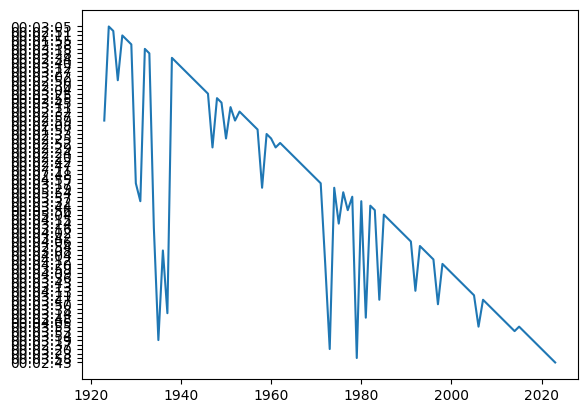

In [4]:
import matplotlib.pyplot as plt
plt.plot(df['year'], df['duration'])

Oops... It seems that the data on the y-axis is not numeric.

We can get a listing of the data types for each column using the `info( )` method.

Activity Goal:
- List basic information for each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      101 non-null    Int64 
 1   artist    101 non-null    string
 2   title     101 non-null    string
 3   duration  101 non-null    string
dtypes: Int64(1), string(3)
memory usage: 3.4 KB


From the data type info (`Dtype`), only the year is an number. The rest of the columns, including `duration`, are all of type string.

A string data type is a way for computers to store text, such as words or other sequences of characters. Even though "00:01:55" looks numeric, it is not one of the basic number formats that python parses by default.

### Parsing the Duration

In order to graph our data, we need to convert the duration strings into numbers. As with most coding goals, there are multiple ways we could pull this off. The following is one approach.

We can first use the `str.split()` method to split each duration string (e.g. "00:01:55"). We'll split using the ":" character to get separate substrings for hours, minutes, and seconds.

Activity Goals:
- Split the duration values on the ':' character.
- Expand the result into new columns.
- Assign the result to a new dataframe called split_duration.
- Show the first 5 rows of split_duration.

In [8]:
split_duration = df['duration'].str.split(':', expand=True)
split_duration

,0,1,2
0,00,02,43
1,00,03,58
2,00,03,23
3,00,03,20
4,00,02,37
...,...,...,...
96,00,02,11
97,00,02,50
98,00,02,51
99,00,03,05


Perfect. The duration strings got split into 3 columns (0, 1 and 2).

The first row represents a song duration that is 0 hours, 2 minutes, and 43 seconds long.

Notice that the hours and minutes have leading zeros. This is a clue that they are still strings, which makes sense the `str.split()` method creates substrings.

Let's now convert all these string values to integers using the `astype()` method.

Activity Goals:
- Convert all values in split_duration to integers.
- Display the first 5 rows.

In [9]:
split_duration = split_duration.astype('int')
split_duration.head(5)

,0,1,2
0,0,2,43
1,0,3,58
2,0,3,23
3,0,3,20
4,0,2,37


This looks like it worked since we no longer have the extra leading zeros.

If we weren't sure, we could confirm these are integers using `df.info( )`.

### Naming the Columns
Now let's bring these new numeric columns back into our main dataframe. We also want give the columns better names than 0, 1 and 2.

We can use 'h', 'm' and 's' as short names for hours, minutes and seconds.

Activity Goals:
- Add 'h', 'm', and 's' columns to our main dataframe.
- Show the first 5 rows.

In [10]:
df[['h', 'm', 's']] = split_duration
df.head(5)

,year,artist,title,duration,h,m,s
0,2023,Morgan Wallen,Last Night,00:02:43,0,2,43
1,2022,Glass Animals,Heat Waves,00:03:58,0,3,58
2,2021,Dua Lipa,Levitating,00:03:23,0,3,23
3,2020,The Weeknd,Blinding Lights,00:03:20,0,3,20
4,2019,Lil Nas X feat. Billy Ray Cyrus,Old Town Road,00:02:37,0,2,37


Cool! We just learned how to split a string into multiple numeric columns!

### Calculating Total Seconds

Now that we have 'h', 'm' and 's' columns, we can use an `eval( )` to calculate the total seconds.

Since there are 3600 seconds in an hour, we can use the formula:

`total_seconds = h*3600 + m*60 + s`

Activity Goals:
- Calculate the total seconds for each song.
- Assign the result to a new column called `total_seconds`.
- Display the first 5 rows.


In [11]:
df['total_seconds'] = df.eval('h*3600 + m*60 + s')
df.head(5)


,year,artist,title,duration,h,m,s,total_seconds
0,2023,Morgan Wallen,Last Night,00:02:43,0,2,43,163
1,2022,Glass Animals,Heat Waves,00:03:58,0,3,58,238
2,2021,Dua Lipa,Levitating,00:03:23,0,3,23,203
3,2020,The Weeknd,Blinding Lights,00:03:20,0,3,20,200
4,2019,Lil Nas X feat. Billy Ray Cyrus,Old Town Road,00:02:37,0,2,37,157


That worked. We now have a single numeric column representing song durations.

# Plotting Top-Hit Song Durations
Let's visualize how the durations of top-hit songs changed over the years.

Activity Goals:
- Plot the total_seconds vs year.
- Label the axes.

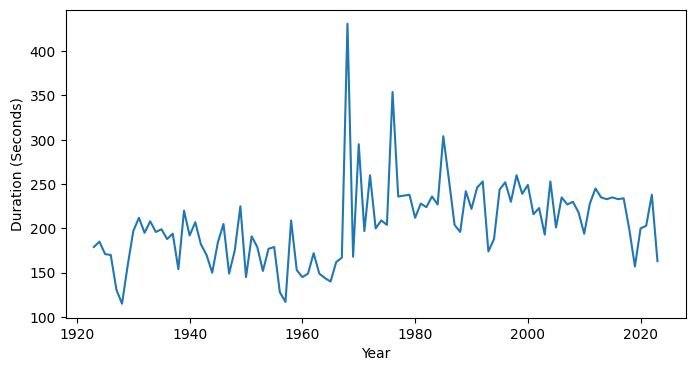

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(df['year'],df['total_seconds'])
plt.xlabel('Year')
plt.ylabel('Duration (Seconds)')
plt.show()


Success! We have a visual!

Notice the sharp spike in song duration in 1968 (431 seconds). The median song duration of the number one hit song increased after this spike.

### The Longest Top Hit
What is that longest top-hit song that forms a sharp peak on the graph? It appears to be about twice as long as any top-hit song that came before it. Let's find out.

Activity Goal:
- Find the longest song in the dataset.

In [13]:
df.query('total_seconds == total_seconds.max()')


,year,artist,title,duration,h,m,s,total_seconds
55,1968,The Beatles,Hey Jude,00:07:11,0,7,11,431


The longest top song is 'Hey Jude' by The Beatles.

## Project extensions


1. What is the average duration of top songs prior to 1968? After 1968?



In [21]:
average_duration_before_1968 = df.query('year < 1968', engine='python')['total_seconds'].mean()
average_duration_after_1968 = df.query('year >= 1968', engine='python')['total_seconds'].mean()
print(f'Average duration of top songs before 1968: {average_duration_before_1968}')
print(f'Average duration of top songs after 1968: {average_duration_after_1968}')

Average duration of top songs before 1968: 172.64444444444445
Average duration of top songs after 1968: 230.48214285714286


# Break down Task
Calculate and display the average duration of songs released before 1968 and after 1968 using the dataframe `df`.

## Separate data

### Subtask:
Create two dataframes, one for songs before 1968 and one for songs after 1968.


**Reasoning**:
Create two dataframes by filtering the original dataframe based on the 'year' column as requested.



In [20]:
df_before_1968 = df.query('year < 1968', engine='python')
df_after_1968 = df.query('year >= 1968', engine='python')

**Reasoning**:
Display the head of the two new dataframes to verify they were created correctly.



In [16]:
display(df_before_1968.head())
display(df_after_1968.head())

,year,artist,title,duration,h,m,s,total_seconds
56,1967,Lulu,To Sir With Love,00:02:47,0,2,47,167
57,1966,The Mamas & The Papas,California Dreamin’,00:02:42,0,2,42,162
58,1965,Sam the Sham and the Pharaohs,Wooly Bully,00:02:20,0,2,20,140
59,1964,The Beatles,I Want to Hold Your Hand,00:02:24,0,2,24,144
60,1963,The Beach Boys,Surfin’ U.S.A.,00:02:29,0,2,29,149


,year,artist,title,duration,h,m,s,total_seconds
0,2023,Morgan Wallen,Last Night,00:02:43,0,2,43,163
1,2022,Glass Animals,Heat Waves,00:03:58,0,3,58,238
2,2021,Dua Lipa,Levitating,00:03:23,0,3,23,203
3,2020,The Weeknd,Blinding Lights,00:03:20,0,3,20,200
4,2019,Lil Nas X feat. Billy Ray Cyrus,Old Town Road,00:02:37,0,2,37,157


## Calculate average duration per song

### Subtask:
For each dataframe, calculate the average duration for each song.


**Reasoning**:
Calculate the average `total_seconds` for the dataframes `df_before_1968` and `df_after_1968` and store them in the specified variables.



In [17]:
average_duration_before_1968 = df_before_1968['total_seconds'].mean()
average_duration_after_1968 = df_after_1968['total_seconds'].mean()

## Display results

### Subtask:
Display the average durations for songs before and after 1968.


**Reasoning**:
Display the calculated average durations.



In [18]:
print(f'Average duration of top songs before 1968: {average_duration_before_1968}')
print(f'Average duration of top songs after 1968: {average_duration_after_1968}')

Average duration of top songs before 1968: 172.64444444444445
Average duration of top songs after 1968: 230.48214285714286


## Summary:

### Data Analysis Key Findings

*   The average duration of songs released before 1968 is approximately 172.64 seconds.
*   The average duration of songs released after 1968 is approximately 230.48 seconds.

### Insights or Next Steps

*   Songs released after 1968 tend to be significantly longer on average than those released before 1968, with an increase of around 57.84 seconds.
*   Further analysis could explore potential factors contributing to this difference, such as changes in musical styles, recording technology, or radio formatting over time.
